# Introduction

We will be taking a deep dive into the world of neural networks and learn how to create one from scratch without using any high-level libraries such as Keras and PyTorch. The goal of this demonstration is to give a better understanding of the underlying mechanics and computations that go into building a neural network. I will be implementing a two-layer neural network using just NumPy.

# Table of Contents

* The Idea of Neural Networks
* Architecture of an ANN
* Training Process
* Data
* Implementation with NumPy

# The Idea Behind Neural Networks

The inspiration behind neural networks comes from the study of the human brain and the way it processes information. The human brain is made up of billions of interconnected neurons that are able to process and transmit information through electrical and chemical signals. Researchers in the field of artificial intelligence and cognitive science have been studying the brain for many years and have discovered that the brain is able to learn and adapt to new information through a process called neural plasticity.

In the 1940s and 1950s, researchers in the field of artificial intelligence began to develop mathematical models that mimic the behavior of neurons and the way they process information. These models, known as Artificial Neural Networks (ANN), were inspired by the structure and function of the human brain.

# Architecture of an ANN

As mentioned above, an ANN is a type of machine learning algorithm that is modeled after the structure and function of the human brain. The architecture of an ANN typically consists of three main layers:

1. Input Layer: The input layer receives the input data and passes it on to the next layer. The number of neurons in the input layer corresponds to the number of features in the input data.

2. Hidden Layers: The hidden layers process the input data and perform computations on it. The number of hidden layers and the number of neurons in each layer can vary depending on the complexity of the problem. In general, the more hidden layers and neurons, the more powerful the network will be in capturing complex patterns in the data.

3. Output Layer: The output layer produces the final output of the network. The number of neurons in the output layer corresponds to the number of output classes or output values.

Below is an example of an ANN with two hidden layers (*Image via https://towardsdatascience.com from Arden Dertat*):

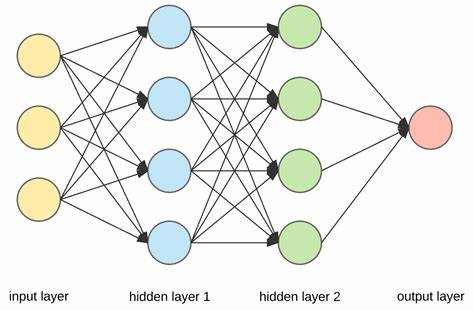

# Training Process

When training an ANN, there are two processes ongoing back and forth:

* **Forward Propagation**
* **Backward Propagation**

### Forward Propagation

Forward Propagation referes to the way we move from the input layer (left) to the output layer (right). It is the first step in the training process of an ANN, where the input data is passed through the input layer, then through any hidden layers, and finally through the output layer.

In forward propagation, the input data is multiplied by the weights of the connections between the neurons in each layer using the dot product. This results in a weighted sum, which is then added to the bias value of the neuron. The result is then passed through an **activation function** to obtain the output of the neuron. The activation function is a mathematical function that is used to introduce non-linearity into the network, which allows the network to learn more complex patterns in the data. Common activation functions include the sigmoid function, the rectified linear unit (ReLU), and the hyperbolic tangent (tanh) function. Below is an image via https://ekababisong.org/ to visualize the process of forward propagation:

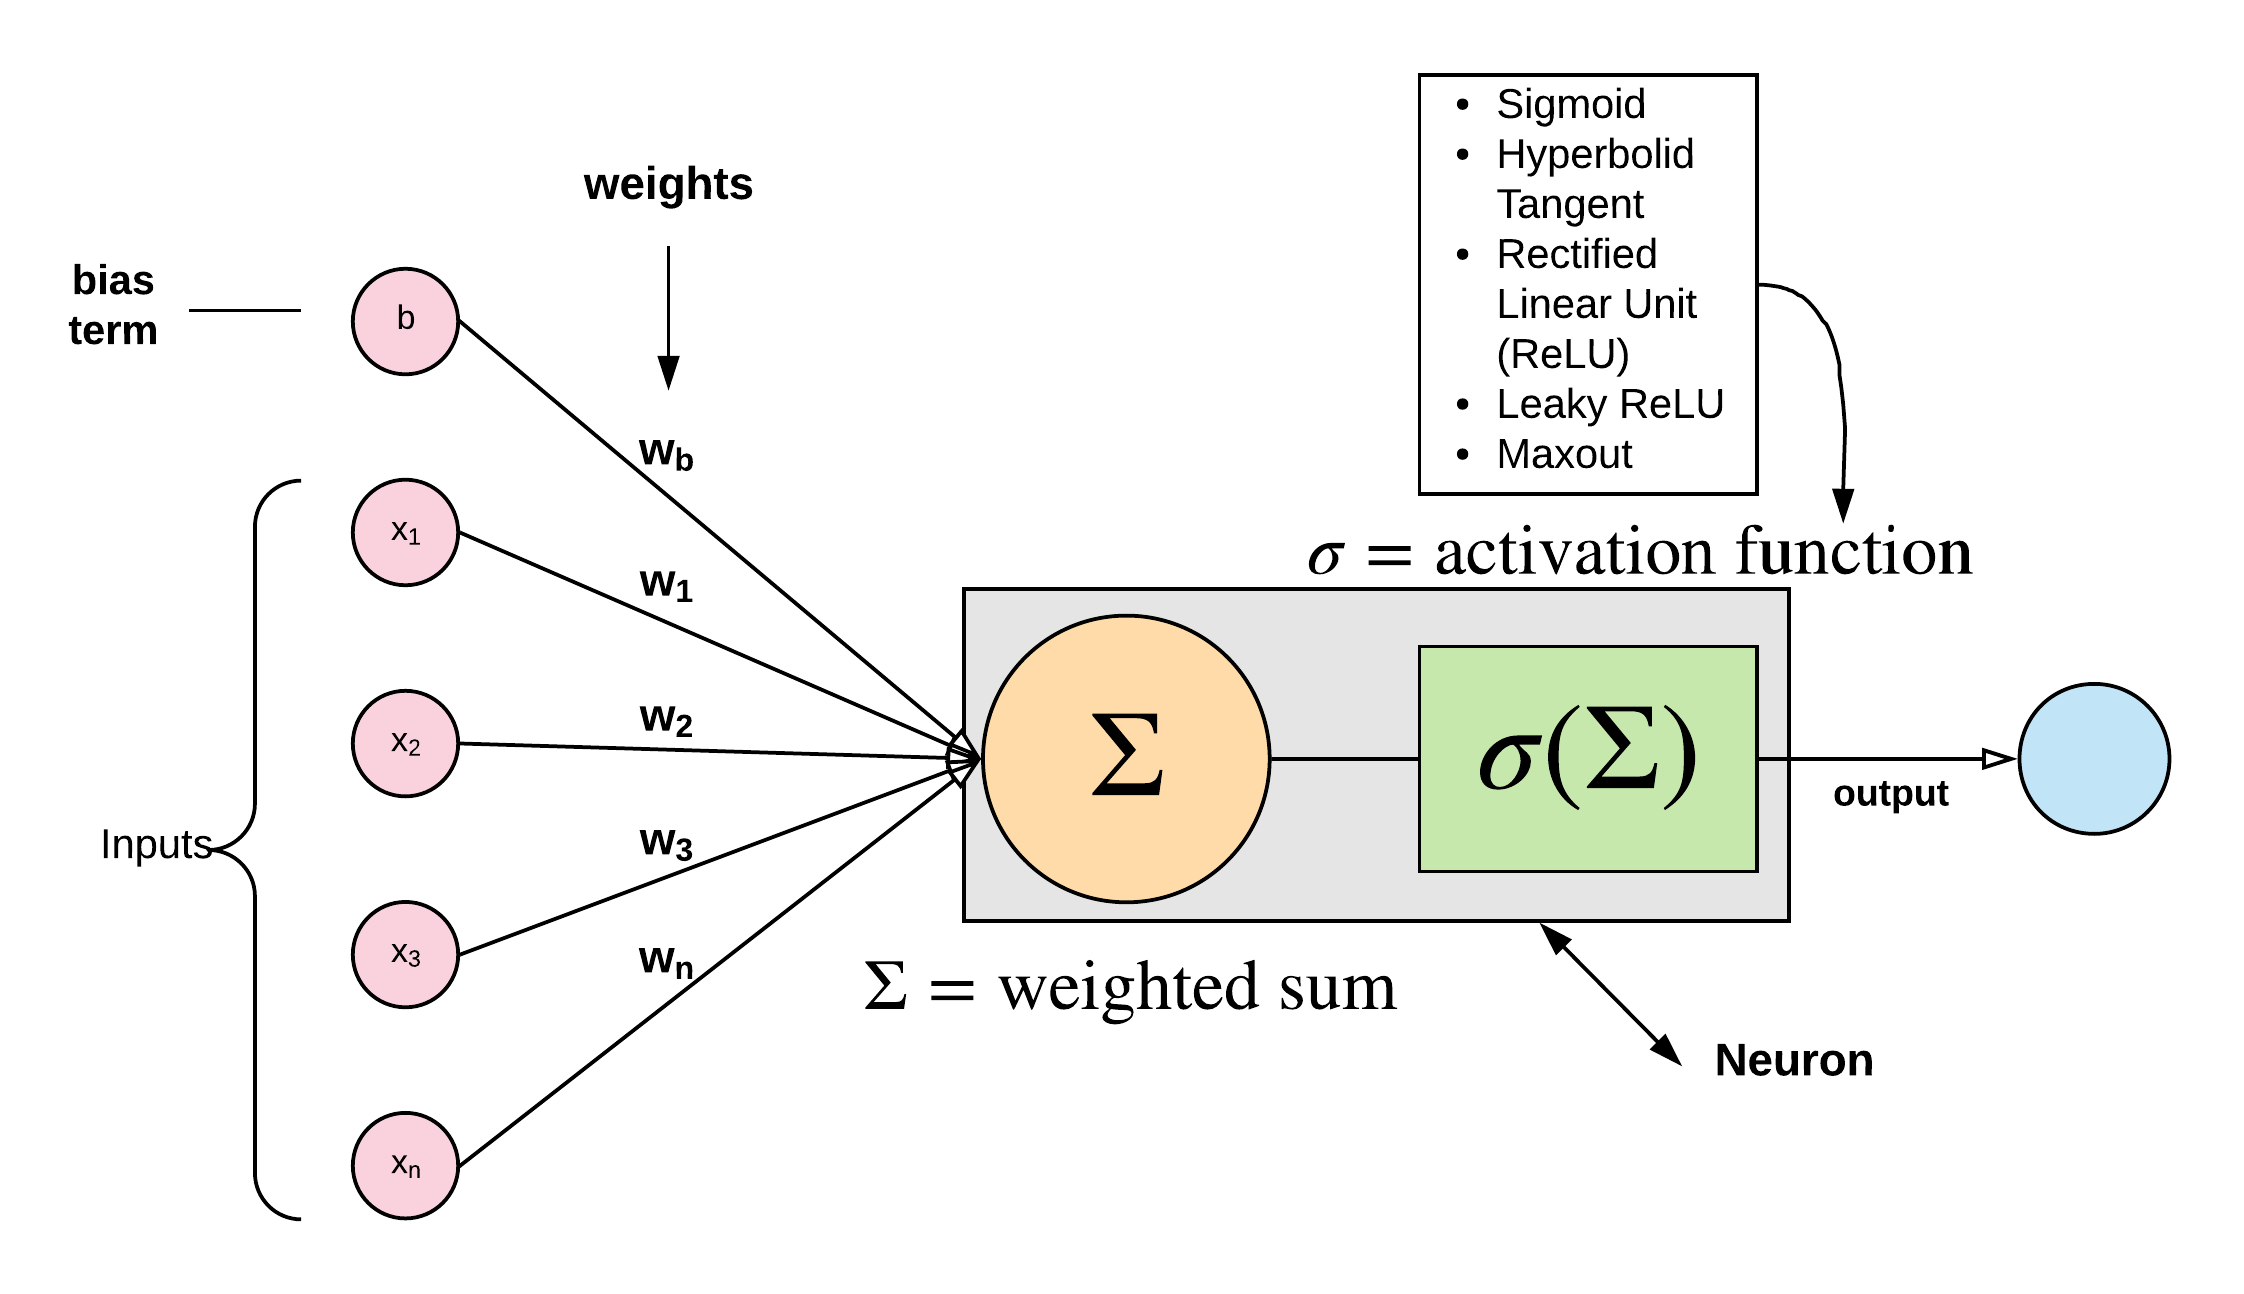

The output of each neuron in a layer is then passed as input to the next layer, and this process is repeated until the final output of the network is obtained. This final output is the predicted output of the network, and it is used to calculate the error between the predicted output and the actual output.

### Backpropagation

Backpropagation is the process of adjusting the weights and biases of an ANN in order to minimize the error between the predicted output and the actual output. The backpropagation process starts with the calculation of the error at the output layer, which is typically done by comparing the predicted output with the actual output. The error is then propagated backwards through the network, layer by layer, by calculating the gradient of the loss function with respect to the weights and biases of the neurons. The gradient is used to update the weights and biases of the neurons in order to reduce the error using an optimization algorithm such as Stochastic Gradient Descent (SGD). Below shows an image via https://www.researchgate.net/ to visualize this process:

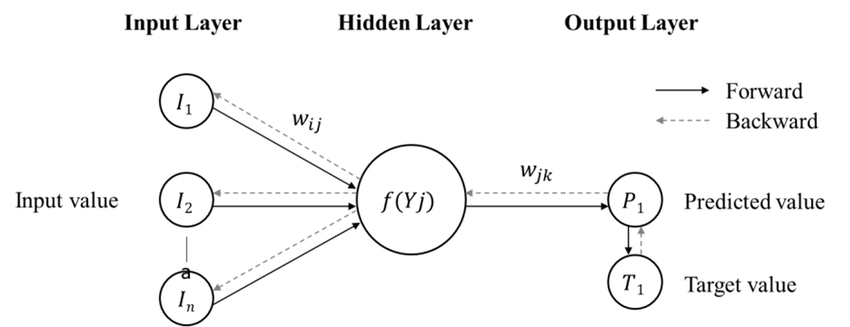

# Data 

I will be using the Iris dataset from Sklearn for this model. We will use Sklearn to load in our data and split into train and test data. Since the Iris dataset has 3 classes, we will make sure to one hot encode our target labels. Usually we use `sklearn.preprocessing.OneHotEncoder` for this, but for this example we will use NumPy.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the target labels
y_onehot = np.zeros((y.shape[0], 3))
y_onehot[np.arange(y.shape[0]), y] = 1

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2)

print('Shape of training data:', X_train.shape)
print('Shape of testing data:', X_test.shape)
print('Shape of training labels:', y_train.shape)
print('Shape of testing labels:', y_test.shape)

Shape of training data: (120, 4)
Shape of testing data: (30, 4)
Shape of training labels: (120, 3)
Shape of testing labels: (30, 3)


# Implementation with NumPy

Below we will create our neural network using just NumPy:

In [23]:
# Define model params
input_neurons = 4
hidden_neurons = 64
output_neurons = 3
learning_rate = 0.001
epochs = 100

# Initialize weights and biases
def init_weights_and_biases():
    W1 = np.random.randn(input_neurons, hidden_neurons)
    b1 = np.random.randn(hidden_neurons)
    W2 = np.random.randn(hidden_neurons, output_neurons)
    b2 = np.random.randn(output_neurons)
    return W1, b1, W2, b2

# Define softmax
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

# Define relu
def relu(x):
    return np.maximum(0, x)

# Define derivative of relu
def reluDerivative(x):
    return np.where(x >= 0, 1, 0)

# Define forward propagation process
def forward_prop(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

# Define loss function
def categorical_crossentropy(a2, y_train):
    loss = -np.mean(np.sum(y_train * np.log(a2), axis=1))
    return loss

# Define backward propagation process
def backward_prop(a1, a2, X, y, learning_rate, W1, b1, W2, b2):
    dz2 = a2 - y
    dw2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0)
    dz1 = np.dot(dz2, W2.T) * reluDerivative(a1)
    dw1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0)

    # Update the weights and biases
    W1 -= learning_rate * dw1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dw2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Function to extract predictions
def get_predictions(a2):
    return np.argmax(a2, axis=1)

# Function to calculate accuracy
def get_accuracy(predictions, y_true):
    return np.mean(predictions == np.argmax(y_true, axis=1))

# Defining training process
def train(X_train, y_train, epochs, learning_rate):
    W1, b1, W2, b2 = init_weights_and_biases()
    iterations = []
    losses = []
    accuracy_scores = []
    final_weights = []
    final_biases = []
    for epoch in range(epochs):
        z1, a1, z2, a2 = forward_prop(X_train, W1, b1, W2, b2)
        loss = categorical_crossentropy(a2, y_train)
        W1, b1, W2, b2 = backward_prop(a1, a2, X_train, y_train, learning_rate, W1, b1, W2, b2)
        predictions = get_predictions(a2)
        accuracy = get_accuracy(predictions, y_train)
        iterations.append(epoch + 1)
        losses.append(loss)
        accuracy_scores.append(accuracy)
        print("Epoch: {} Loss: {:.4f} Accuracy: {:.4f}".format(epoch + 1, loss, accuracy))
    final_weights.extend([W1, W2])
    final_biases.extend([b1, b2])
    return iterations, losses, accuracy_scores, final_weights, final_biases

# Set seed for reproducibility
np.random.seed(42)     

# Train our model
iterations, losses, accuracy_scores, final_weights, final_biases = train(X_train, y_train, epochs, learning_rate)

Epoch: 1 Loss: 41.3063 Accuracy: 0.6250
Epoch: 2 Loss: 71.9400 Accuracy: 0.3750
Epoch: 3 Loss: 92.0203 Accuracy: 0.3167
Epoch: 4 Loss: 18.4904 Accuracy: 0.5667
Epoch: 5 Loss: 4.2815 Accuracy: 0.4833
Epoch: 6 Loss: 1.4900 Accuracy: 0.6917
Epoch: 7 Loss: 16.4274 Accuracy: 0.6167
Epoch: 8 Loss: 7.2702 Accuracy: 0.6917
Epoch: 9 Loss: 1.2671 Accuracy: 0.6250
Epoch: 10 Loss: 11.1973 Accuracy: 0.6917
Epoch: 11 Loss: 0.7359 Accuracy: 0.7083
Epoch: 12 Loss: 3.7262 Accuracy: 0.6250
Epoch: 13 Loss: 3.3173 Accuracy: 0.6917
Epoch: 14 Loss: 0.1763 Accuracy: 0.9667
Epoch: 15 Loss: 0.1458 Accuracy: 0.9833
Epoch: 16 Loss: 0.1396 Accuracy: 0.9833
Epoch: 17 Loss: 0.1331 Accuracy: 0.9833
Epoch: 18 Loss: 0.1305 Accuracy: 0.9833
Epoch: 19 Loss: 0.1259 Accuracy: 0.9833
Epoch: 20 Loss: 0.1241 Accuracy: 0.9833
Epoch: 21 Loss: 0.1205 Accuracy: 0.9833
Epoch: 22 Loss: 0.1190 Accuracy: 0.9833
Epoch: 23 Loss: 0.1163 Accuracy: 0.9833
Epoch: 24 Loss: 0.1151 Accuracy: 0.9833
Epoch: 25 Loss: 0.1137 Accuracy: 0.9833
Epo

Now we will visualize our training process with Matplotlib:

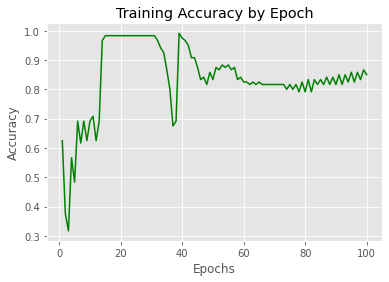

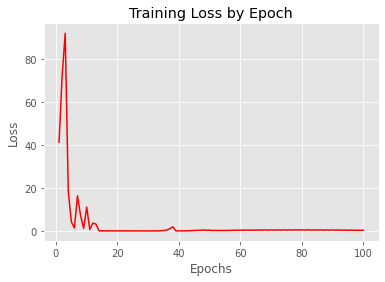

In [3]:
plt.rcParams['figure.figsize'] = (15, 8)

# Plot training accuracy
fig, ax = plt.subplots()

ax.plot(iterations, accuracy_scores, color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy by Epoch')
plt.show()

# Plot training loss
fig, ax = plt.subplots()

ax.plot(iterations, losses, color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss by Epoch')
plt.show()

Finally, we will define a function to test our model on the test data and return the accuracy:

In [28]:
def test_accuracy(X_test, y_test, w, b):
    _, _, _, a2 = forward_prop(X_test, w[0], b[0], w[1], b[1])
    predictions = get_predictions(a2)
    accuracy = get_accuracy(predictions, y_test)
    print("Test accuracy:", round(accuracy, ndigits=4))

test_accuracy(X_test, y_test, final_weights, final_biases)

Test accuracy: 0.9667
